In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df = gpd.read_file("./land/japan.geojson")

In [4]:
dfp = pd.read_table("./shikuchoson.csv")

In [5]:
all_points = []
for _, row in df.iterrows():
    all_points.append((row["経度"], row["緯度"]))

In [37]:
import random
points = random.sample(all_points, 500)
# points = all_points

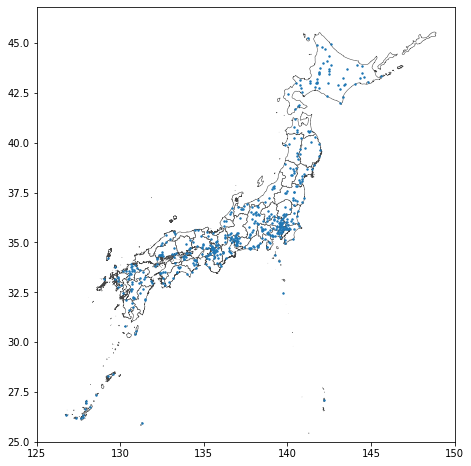

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
df.plot(figsize=(8,8), edgecolor='#444', facecolor='white', linewidth = 0.5, ax=ax)
ax.set_xlim(125, 150)
ax.set_ylim(25, None)
x = [p[0] for p in points]
y = [p[1] for p in points]
# ax.plot(x, y)
ax.scatter(x, y, s=2)

pass

In [27]:
import tsp_solver

In [41]:
%%time
import datetime as dt
# t = dt.datetime.now()
route = tsp_solver.solve(points)
# print(f"{(dt.datetime.now() - t).seconds}")

CPU times: user 697 ms, sys: 0 ns, total: 697 ms
Wall time: 682 ms


In [43]:
optimized = []
for index in route:
    optimized.append(points[index])

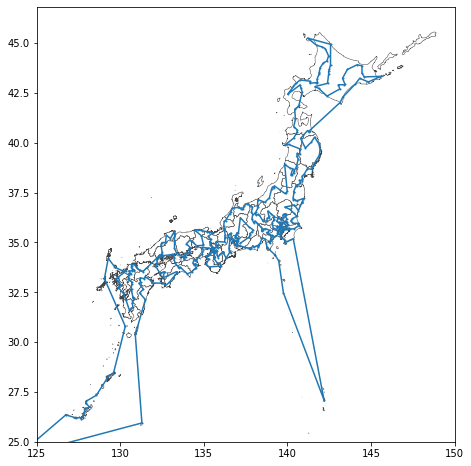

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
df.plot(figsize=(8,8), edgecolor='#444', facecolor='white', linewidth = 0.5, ax=ax)
# dfp[["緯度", "経度"]].plot.scatter(x="経度", y="緯度", ax=ax)
ax.set_xlim(125, 150)
ax.set_ylim(25, None)
x = [p[0] for p in optimized]
y = [p[1] for p in optimized]
ax.plot(x, y)
ax.scatter(x, y, s=1)
pass

In [16]:
import python_tsp_solver

<module 'python_tsp_solver' from '/home/tanashou1/study_group/python_module/python_tsp_solver.py'>

In [45]:
%%time
route_py = python_tsp_solver.solve(points)

CPU times: user 8.91 s, sys: 14 ms, total: 8.93 s
Wall time: 8.91 s
